In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel(r"E:\Learner's Space\ML\Training data.xlsx")
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  for i in x_train:
    if i[0]=='yes':
        i[0]=1
    else:
        i[0]=0

  for i in x_train:
    if i[1]=='F':
        i[1]=1
    else:
        i[1]=0
  return x_train

x_train = feature_changing(x_train)

In [14]:
def z_score(x_train):

  x_std=np.std(x_train)
  x_mean= np.mean(x_train)

  #feature scaling:
  x_train= (x_train-x_mean)/x_std


  return x_train,x_std,x_mean

In [15]:
x_train.shape

(1000, 8)

In [16]:
def cost(x_train,y_train,w,b):
  (n,m)=x_train.shape
  loss=0
  f_x=0
# Have to divide cost by 2n for mean
  for i in range(n):
    f_x= np.dot((w)[:,0],(x_train[i]))+b  
    loss+= 1/(2*n)*(f_x-y_train[i])**2
  return loss

In [17]:
def gradient_descent(x_train,y_train,w,b):
    alpha=0.003 ##Learning Rate
    grad_w=grad_b=f_x=0
    (n,m)=x_train.shape
    for i in range(n):
      f_x= np.dot((w)[:,0],(x_train[i]))+b
      grad_w+= 1/(n)*((x_train[i])*(f_x-y_train[i]))
      grad_b+= 1/(n)*(f_x-y_train[i])
    temp_w= w- alpha*grad_w.reshape(8,1)
    temp_b= b- alpha*grad_b
    w=temp_w
    # print(grad_w.shape)
    b=temp_b

    return w,b

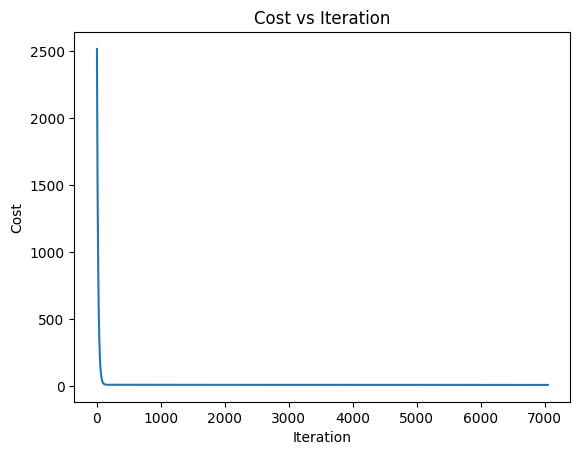

[0.0001]


In [20]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)


old_cost = 0
cost_values = []  # List to store cost values
iteration = 0  # Iteration counter
# for i in range(1000):
# Training loop
while abs(old_cost - cost(x_train, y_train, w, b)) > 0.0001:
    old_cost = cost(x_train, y_train, w, b)
    cost_values.append(old_cost)
    w, b = gradient_descent(x_train, y_train, w, b)
    iteration += 1

# Plotting cost vs iteration
plt.plot(cost_values)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

print(cost_values[-2]-cost_values[-1])

In [22]:
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict,x_std,x_mean = z_score(x_predict)
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()


y_predict= np.dot((x_predict),(w)[:,0])+b

accuracy = 0
for dim in range(len(ans)):

  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Optimization required, your accuracy is 11.0%


array([[ 1.62868095],
       [-1.10832242],
       [ 1.39316669],
       [ 0.68853727],
       [-1.17344828],
       [-0.17520816],
       [-1.07888427],
       [ 0.08735764]])